In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Lecture 8 

## Numerical Distribution

In [2]:
top_movies = Table.read_table('top_movies_2017.csv')
top_movies

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


In [3]:
ages = 2021 - top_movies.column('Year')
ages

array([ 82,  44,  56,  39,  24,  65,  46,  56,  48,  84,   6,  60,  41,
        62,  12,  38,  28,  22,  27,  48,  40,  54,  80,   6,  49,  27,
        57,  43,   9,  56,  13,  54,  62,  37,  17,  52,  51,  19,  25,
        31,  81,  58,  37,  57,  51,  48,  68,  15,  65,  79,  47,  32,
        76,  18,  18,  47,   5,  71,  17,  69,  57,  43,  17,  16,  36,
        19,   9,  22,  43,  39,  44,   4,   5,  60,  20,  66,  44,  59,
        46,  45,  75,  49,  20,  25,  24,  64,  12,  58,  61,  46,  51,
        37,   6,  19,  28,  29,  11,  31,   8,  75,   9,  18,  68,  67,
        24,  32,  20,   8,  14,   8,  30,  80,  21,  35,  10,  22,  20,
        14,   8,   5,  18,  14,  35, 100,  23,   4,  47,  68,  37,  30,
        16,  16,  14,  19,  28,  67,  13,  10,  17,  13,  26,   4,  31,
        39,  53,  33,   5,  54,   6,   7,  42,  23,  61,  39,  14,  36,
        26,   5,  31,  47,  11,  17,  21,  29,   5,  34,  19,   7,   6,
        25,   7,   6,  44,  40,  22,  12,  18,  17,  53,  21,  2

In [4]:
top_movies = top_movies.with_column('Age', ages)
top_movies

Title,Studio,Gross,Gross (Adjusted),Year,Age
Gone with the Wind,MGM,198676459,1796176700,1939,82
Star Wars,Fox,460998007,1583483200,1977,44
The Sound of Music,Fox,158671368,1266072700,1965,56
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982,39
Titanic,Paramount,658672302,1204368000,1997,24
The Ten Commandments,Paramount,65500000,1164590000,1956,65
Jaws,Universal,260000000,1138620700,1975,46
Doctor Zhivago,MGM,111721910,1103564200,1965,56
The Exorcist,Warner Brothers,232906145,983226600,1973,48
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937,84


## Histograms ##

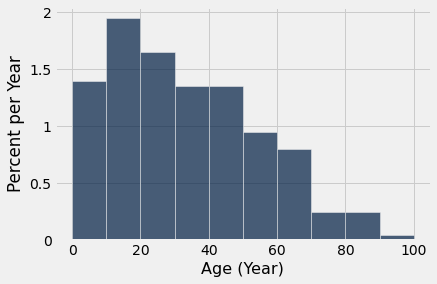

In [5]:
# Let's try equally spaced bins
top_movies.hist('Age', bins = np.arange(0, 110, 10), unit = 'Year')

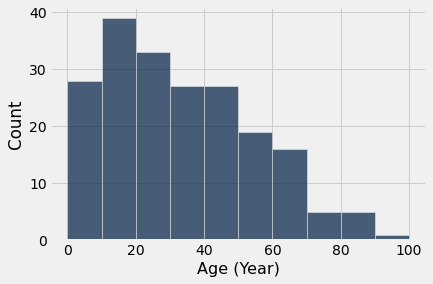

In [6]:

top_movies.hist('Age', bins = np.arange(0, 110, 10), unit = 'Year', normed=False)

In [7]:
my_bins = make_array(0,10, 20, 40, 60, 100)
my_bins

array([  0,  10,  20,  40,  60, 100])

In [ ]:
top_movies.bin('Age', bins = my_bins)

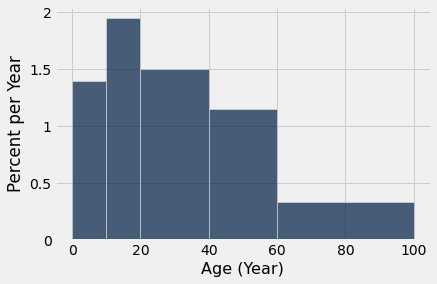

In [8]:
# unequal bins
top_movies.hist('Age', bins = my_bins, unit = 'Year')

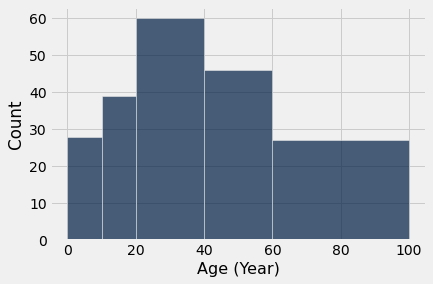

In [17]:
top_movies.hist('Age', bins = my_bins, unit = 'Year', normed=False)
# for unequal bins, normed=False gives the wrong area; not recommended

In [10]:
binned_data = top_movies.bin('Age', bins = my_bins)
binned_data

bin,Age count
0,28
10,39
20,60
40,46
60,27
100,0


In [11]:
# Add a column containing what percent of movies are in each bin
binned_data = binned_data.with_column(
    'Percent', 100*binned_data.column('Age count')/200)
binned_data

bin,Age count,Percent
0,28,14
10,39,19.5
20,60,30
40,46,23
60,27,13.5
100,0,0


## Height 

### Question: What is the height of the [40, 60) bin?

In [14]:
# Step 1: Calculate % of movies in the [40, 60) bin
percent = binned_data.where('bin', 40).column('Percent').item(0)
percent

23.0

In [15]:
# Step 2: Calculate the width of the 40-60 bin
width = 60 - 40
width

20

In [16]:
# Step 3: Area of rectangle = height * width
#         --> height = percent / width
height = percent / width
height

1.15

## Functions ##

In [18]:
def triple(x):
    return 3 * x

In [19]:
triple(3)

9

In [20]:
num = 4

In [21]:
triple(num)

12

In [22]:
triple(num * 5)

60

### Note About Scopes

In [23]:
 x

NameError: name 'x' is not defined

In [24]:
x = 5

In [25]:
triple(2 * x)

30

In [26]:
x

5

### Type Agnostic

In [27]:
triple('ha')

'hahaha'

In [28]:
np.arange(4)

array([0, 1, 2, 3])

In [29]:
triple(np.arange(4))

array([0, 3, 6, 9])

### Discussion Question

In [30]:
def percent_of_total(s):
    return s / sum(s) * 100

In [31]:
percent_of_total(make_array(1,2,3,4))

array([10., 20., 30., 40.])

In [32]:
percent_of_total(make_array(1, 213, 38))

array([ 0.3968254 , 84.52380952, 15.07936508])

### Multiple Arguments

$ h^2 = x^2 + y^2 \hspace{20 pt} => \hspace{20 pt} h = \sqrt{ x^2 + y^2 } $

In [33]:
def hypotenuse(x,y):
    hypot_squared = (x ** 2 + y ** 2)
    return hypot_squared ** 0.5

In [34]:
hypotenuse(3, 4)

5.0

In [35]:
hypotenuse(9, 12)

15.0

In [36]:
hypotenuse(2, 2)

2.8284271247461903